In [1]:
#Evaluation 3

In [2]:
#Primero se utilizaran los mapas del trabajo anterior

In [3]:
import os

import geopandas as gpd
from  fiona import listlayers

#maps
romaniaMaps='https://github.com/Clases-y-Evaluaciones-DelaCruz-Diana/Evaluation3-DelaCruz/raw/main/maps/romaniaMaps_4316.gpkg'

#layers in maps
listlayers(romaniaMaps)

['countries', 'cities', 'rivers']

In [4]:
romania=gpd.read_file(romaniaMaps,layer='countries')
romania_cities=gpd.read_file(romaniaMaps,layer='cities')
romania_rivers=gpd.read_file(romaniaMaps,layer='rivers') 

In [5]:
romania.crs.to_epsg()==romania_cities.crs.to_epsg()==romania_rivers.crs.to_epsg()

True

<Axes: >

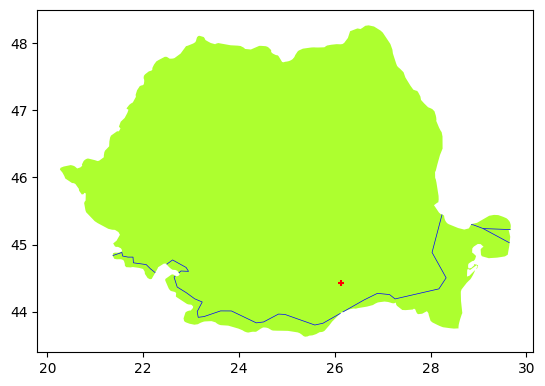

In [6]:
base = romania.plot(facecolor="greenyellow")
romania_rivers.plot(edgecolor='blue', linewidth=0.5,ax=base)
romania_cities.plot(marker='+', color='red', markersize=15,ax=base)

In [7]:
#Ejercicio 1

In [8]:
romania

,COUNTRY,geometry
0,Romania,"POLYGON ((22.68309 44.22786, 22.68943 44.27718..."


In [9]:
romania.boundary

0    LINESTRING (22.68309 44.22786, 22.68943 44.277...
dtype: geometry

<Axes: >

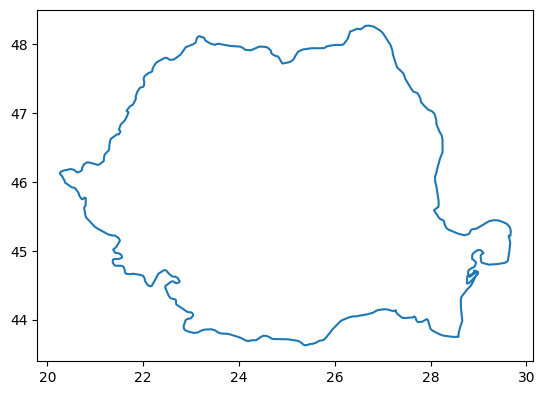

In [10]:
romania.boundary.plot()

In [11]:
type(romania.boundary)

geopandas.geoseries.GeoSeries

In [12]:
# convirtiendo a GDF
romania.boundary.to_frame()

,0
0,"LINESTRING (22.68309 44.22786, 22.68943 44.277..."


In [13]:
# conversion
romania_border=romania.boundary.to_frame() 

# new column (optional)
romania_border['name']='Romania' 

# renaming the geometry column
romania_border.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
#cuando se coloca el set_geometry se debe colocar en comillas el nombre de la geometria
romania_border = romania_border.set_geometry("geometry")

# verifying:
romania_border.crs

<Geographic 2D CRS: EPSG:4316>
Name: Dealul Piscului 1930
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Romania - onshore.
- bounds: (20.26, 43.62, 29.74, 48.27)
Datum: Dealul Piscului 1930
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [14]:
romania_border

,geometry,name
0,"LINESTRING (22.68309 44.22786, 22.68943 44.277...",Romania


In [15]:
#Ejercicio 2

In [16]:
romania_states=gpd.read_file(os.path.join("maps","DEU_adm","DEU_adm2.shp"))
romania_municipalities=gpd.read_file(os.path.join("maps","DEU_adm","DEU_adm3.shp"))

DriverError: maps\DEU_adm\DEU_adm2.shp: No such file or directory